## Title: Predicting Job Placement



Problem Definition: This is a classification problem, where we aim to predict whether a college graduate will be successfully placed in a job or not based on various factors.

Problem Statement: Can we develop a machine learning model that accurately predicts the likelihood of a college graduate getting placed in a job, based on their academic and demographic characteristics?

# Data:

Sourcing: We can collect data from college placement cells, job portals, or online surveys.
Parameters: We can consider factors such as:
Academic performance (GPA, CGPA, etc.)
Demographic information (age, gender, location, etc.)
Course/program details (major, specialization, etc.)
Internship/work experience
Skills and certifications
Job market trends and industry demands
Evaluation Metric: We can use metrics such as accuracy, precision, recall, and F1-score to evaluate the performance of our model.

## Features:

We can create a data dictionary to document the features and their descriptions.
Some potential features include:
GPA
Age
Gender
Course/program details
Internship/work experience
Skills and certifications
Job market trends and industry demands
## Preparing the Tools:

We can use libraries such as Pandas, NumPy, Matplotlib/Seaborn, and Scikit-learn for data analysis, visualization, and machine learning modeling.
Load Data:

We can load the collected data into a Pandas dataframe for further analysis.
Data Exploration (EDA):

We can perform EDA to understand the distribution of the data, identify missing values, and explore correlations between features.
Some potential questions to answer during EDA include:
What is the distribution of GPA scores?
How does age affect job placement?
Are there any correlations between course/program details and job placement?
## Modelling:

We can split the data into training and testing sets.
We can choose a suitable classification algorithm (e.g., logistic regression, decision trees, random forests) and train the model.
We can perform hyperparameter tuning and cross-validation to improve the model's performance.
### Evaluating the Model:

We can use metrics such as accuracy, precision, recall, and F1-score to evaluate the model's performance.
We can also use techniques such as ROC curve and AUC score to evaluate the model's performance.
### Feature Importance:

We can use techniques such as permutation importance or SHAP values to determine which features contribute most to the model's predictions.
Experimentation:

We can experiment with different models, hyperparameters, and feature engineering techniques to improve the model's performance.
We can discuss with our team to identify potential areas for improvement, such as collecting more data or trying alternative models.
### Saving the Model:

If the model performs well, we can save it and share it with others for deployment.
We can use techniques such as model serialization or containerization to deploy the model in a production-ready environment.

In [291]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("job_placement_dataset.csv")
df.head()

In [262]:
df.shape

(215, 15)

In [263]:
df.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [264]:
df.duplicated().sum()

0

In [265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          215 non-null    int64  
dtypes: float64(5), int64(2), object(8)
memory usage: 25.3+ KB


In [266]:
df.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,275592.916279
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,114347.529070
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,8700.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,260000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [267]:
import seaborn as sns

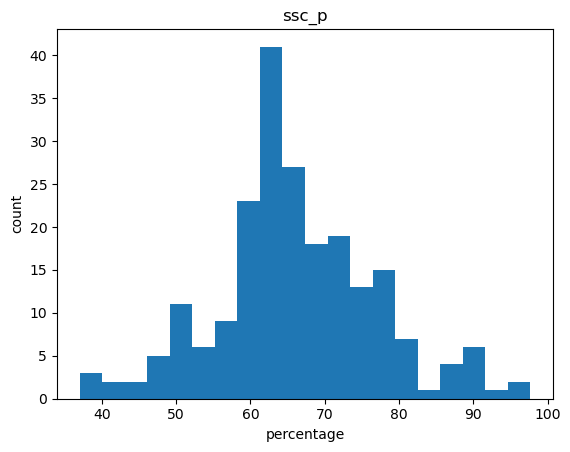

In [268]:
plt.hist(df['hsc_p'],bins=20)
plt.title("ssc_p")     
plt.xlabel('percentage') 
plt.ylabel('count')
plt.show() 

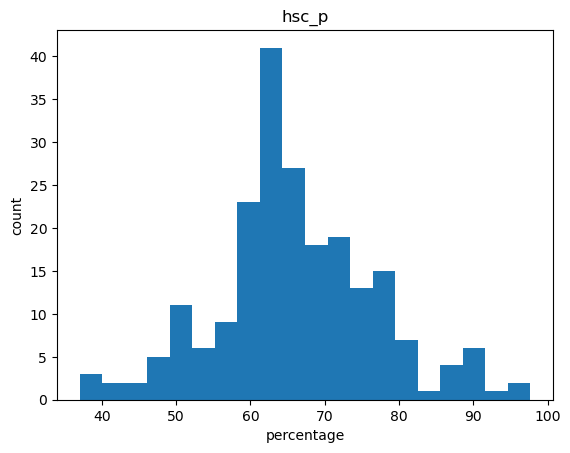

In [269]:
plt.hist(df['hsc_p'],bins=20)
plt.title("hsc_p")     
plt.xlabel('percentage') 
plt.ylabel('count')
plt.show() 

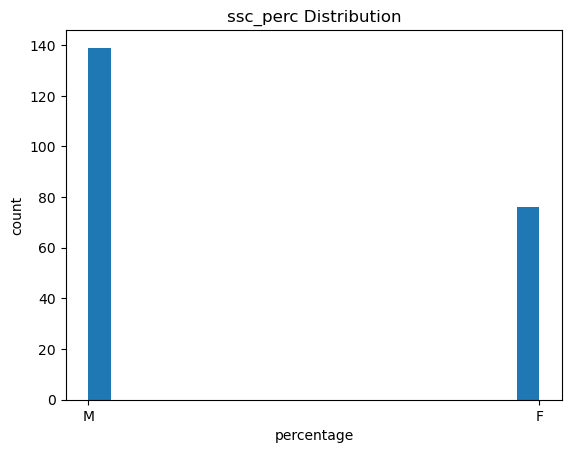

In [270]:
plt.hist(df['gender'],bins=20)
plt.title("ssc_perc Distribution")     
plt.xlabel('percentage') 
plt.ylabel('count')
plt.show()

In [271]:
df['status']

0          Placed
1          Placed
2          Placed
3      Not Placed
4          Placed
          ...    
210        Placed
211        Placed
212        Placed
213        Placed
214    Not Placed
Name: status, Length: 215, dtype: object

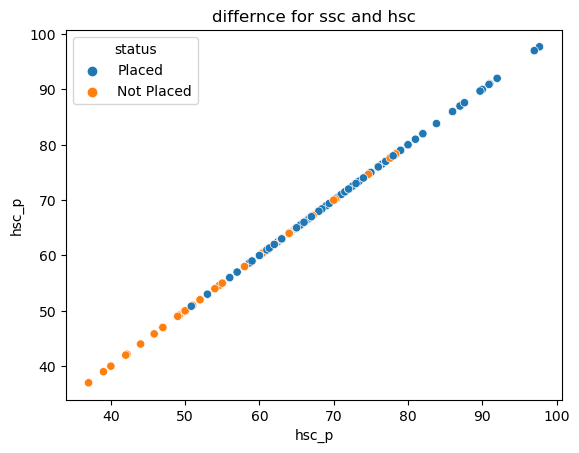

In [272]:
sns.scatterplot(x='hsc_p', y='hsc_p', data=df, hue='status')
plt.title("differnce for ssc and hsc")
plt.show() 

In [273]:
df['status'].value_counts()

status
Placed        148
Not Placed     67
Name: count, dtype: int64

In [274]:
df= pd.get_dummies(df,columns=['gender','ssc_b','hsc_b','hsc_s','degree_t','workex','specialisation','status'],drop_first=True)

In [275]:
df

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender_M,ssc_b_Others,hsc_b_Others,hsc_s_Commerce,hsc_s_Science,degree_t_Others,degree_t_Sci&Tech,workex_Yes,specialisation_Mkt&HR,status_Placed
0,1,67.00,91.00,58.00,55.0,58.80,270000,True,True,True,True,False,False,True,False,True,True
1,2,79.33,78.33,77.48,86.5,66.28,200000,True,False,True,False,True,False,True,True,False,True
2,3,65.00,68.00,64.00,75.0,57.80,250000,True,False,False,False,False,False,False,False,False,True
3,4,56.00,52.00,52.00,66.0,59.43,15000,True,False,False,False,True,False,True,False,True,False
4,5,85.80,73.60,73.30,96.8,55.50,425000,True,False,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,80.60,82.00,77.60,91.0,74.49,400000,True,True,True,True,False,False,False,False,False,True
211,212,58.00,60.00,72.00,74.0,53.62,275000,True,True,True,False,True,False,True,False,False,True
212,213,67.00,67.00,73.00,59.0,69.72,295000,True,True,True,True,False,False,False,True,False,True
213,214,74.00,66.00,58.00,70.0,60.23,204000,False,True,True,True,False,False,False,False,True,True


In [276]:
x = df.drop('status_Placed', axis=1) 
y = df['status_Placed']
print(x.shape, '\n\n', y.shape)


(215, 16) 

 (215,)


In [277]:
from sklearn.model_selection import train_test_split

In [278]:
x_train, x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=42)

In [279]:
x_train.shape

(172, 16)

In [280]:
x_test.shape

(43, 16)

In [281]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()

In [282]:
lg.fit(x_train, y_train)
y_pred = lg.predict(x_test)
y_pred

C:\Users\JKU\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([ True, False,  True,  True,  True, False, False,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True, False,
       False,  True,  True,  True, False, False,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True])

In [283]:
from sklearn.metrics import accuracy_score

In [284]:
accuracy_score(y_test,y_pred)

0.8604651162790697

In [288]:
input_data = ( 	67.00 ,	91.00, 	58.00, 	55.0 	,58.80, 	270000 ,	True, 	True 	,True, 	True ,	False, 	False ,	True 	,False, 	True 	,True)

,
# Convert boolean values to integers
input_data = [1 if isinstance(item, bool) else item for item in input_data]

np_array = np.asarray(input_data)
reshaped_array = np_array.reshape(1,-1)


prediction = lg.predict(reshaped_array)  
if prediction[0] == 1:
    print("Person is placed")


else:
    print("Person is not placed")

Person is not placed


C:\Users\JKU\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [286]:
df

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender_M,ssc_b_Others,hsc_b_Others,hsc_s_Commerce,hsc_s_Science,degree_t_Others,degree_t_Sci&Tech,workex_Yes,specialisation_Mkt&HR,status_Placed
0,1,67.00,91.00,58.00,55.0,58.80,270000,True,True,True,True,False,False,True,False,True,True
1,2,79.33,78.33,77.48,86.5,66.28,200000,True,False,True,False,True,False,True,True,False,True
2,3,65.00,68.00,64.00,75.0,57.80,250000,True,False,False,False,False,False,False,False,False,True
3,4,56.00,52.00,52.00,66.0,59.43,15000,True,False,False,False,True,False,True,False,True,False
4,5,85.80,73.60,73.30,96.8,55.50,425000,True,False,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,80.60,82.00,77.60,91.0,74.49,400000,True,True,True,True,False,False,False,False,False,True
211,212,58.00,60.00,72.00,74.0,53.62,275000,True,True,True,False,True,False,True,False,False,True
212,213,67.00,67.00,73.00,59.0,69.72,295000,True,True,True,True,False,False,False,True,False,True
213,214,74.00,66.00,58.00,70.0,60.23,204000,False,True,True,True,False,False,False,False,True,True
